In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from fredapi import Fred
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
from itertools import product

In [20]:
# fetch FRED data
def fetch_fred_data(api_key, series_id):
    fred = Fred(api_key=api_key)
    data = fred.get_series(series_id)
    df = pd.DataFrame({'date': data.index, 'value': data.values})
    return df

In [21]:
# Fetch ICNSA data using FRED API
FRED_API_KEY = '360481124fc765b815de2697f1bf8d62'
icnsa = fetch_fred_data(api_key=FRED_API_KEY, series_id='ICNSA')

# Converting 'value' column to numeric
icnsa['value'] = pd.to_numeric(icnsa['value'], errors='coerce')

# Checking missing values
missing_values = icnsa['value'].isnull().any()
print("Missing Values:", missing_values)


Missing Values: False


In [22]:
# Handling extreme values during COVID years using winsorization
covid_threshold = np.nanquantile(icnsa['value'], 0.99)
icnsa['value'] = np.clip(icnsa['value'], a_min=None, a_max=covid_threshold)

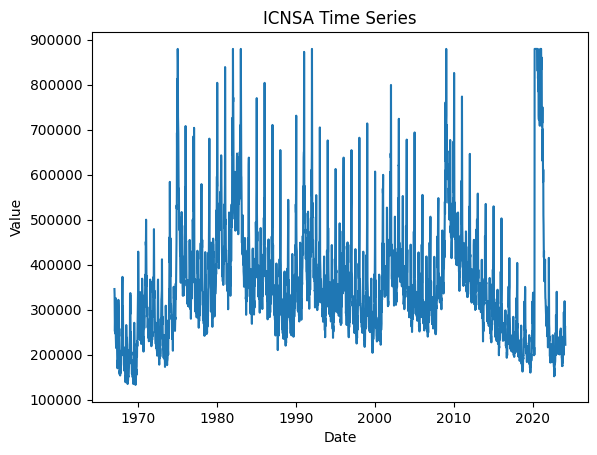

In [23]:
# Time series plot
plt.plot(icnsa['date'], icnsa['value'])
plt.title("ICNSA Time Series")
plt.xlabel("Date")
plt.ylabel("Value")
plt.show()

In [24]:
# Fit SARIMAX model with the best parameters
best_order = (2, 1, 14)
arima_model_best = SARIMAX(icnsa['value'], order=best_order)
arima_results_best = arima_model_best.fit(disp=False)

In [25]:
# Forecast for February 15th
forecast_arima = arima_results_best.get_forecast(steps=1)
predicted_value = round(forecast_arima.predicted_mean.values[0])

print("Forecast value for February 15th:", predicted_value)



Forecast value for February 15th: 218849
